<a href="https://colab.research.google.com/github/harrymkwn/InfluenceAnalysis/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import re
import string
from scipy import spatial
from sklearn.utils import shuffle 
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score

In [2]:
from google.colab import  drive

drive.mount('/content/drive')

Mounted at /content/drive


#Data Import

In [3]:
df_train = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Data/Train/clean_all_train.csv')
df_train = df_train
df_train.head()

,Unnamed: 0,Tweets,Labels,Category
0,0,How the fuck Who the heck moved my fridge ...,0.938,anger
1,1,So my Indian Uber driver just called someone t...,0.896,anger
2,2,UK I asked for my parcel to be delivered to a...,0.896,anger
3,3,so ef whichever butt wipe pulled the fire alar...,0.896,anger
4,4,do not join they put the phone down on you ta...,0.896,anger


In [7]:
df_dev = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Data/Dev/clean_all_val_csv.csv')
df_dev = df_dev
df_dev.head()

,Unnamed: 0,Tweets,Labels,Category
0,0,pls dont insult the word Molna,0.479,anger
1,1,I would have almost tok offense to this if I ...,0.458,anger
2,2,that Rutgers game was an abomination An aff...,0.562,anger
3,3,that is what lisa asked before she started ra...,0.500,anger
4,4,Sometimes I get mad over something so minuscul...,0.708,anger


In [8]:
df_test = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Data/Test/clean_all_test.csv')
df_test = df_test
df_test.head()

,Unnamed: 0,Tweets,Labels,Category
0,0,At the point today where if someone says somet...,0.319,anger
1,1,IT S GAME DAY T MINUS 14Happy ...,0.144,anger
2,2,This game has pissed me off more than any othe...,0.898,anger
3,3,I have just found out it is Candice and not C...,0.271,anger
4,4,if he cannot come to my Mum a 60th after ...,0.646,anger


In [9]:
def find_length(tweet):

  return len(tweet.split())

In [10]:
def remove_numbers(tweet):
  tweet = re.sub('[0-9]+','',tweet)
  return tweet

In [11]:
hash={"anger":[1,0,0,0],"sadness":[0,1,0,0],"joy":[0,0,1,0],"fear":[0,0,0,1]}
def number_category(category):
  return hash[category]

In [43]:
df_train['Encoding'] = df_train['Category'].apply(lambda category : number_category(category))
df_train['Length'] = df_train['Tweets'].apply(lambda tweet : find_length(tweet))
df_train['Tweets'] = df_train['Tweets'].apply(lambda tweet : remove_numbers(tweet))

trainLength = df_train['Length'].max()

df_train.head()

,Unnamed: 0,Tweets,Labels,Category,Encoding,Length
0,257,oh my good UUUUGGGGHHHHHHHHH rage,0.583,anger,"[1, 0, 0, 0]",5
1,3270,Trying to think positive and not let this situ...,0.440,sadness,"[0, 1, 0, 0]",12
2,2641,myself that despite the absolute delight my ch...,0.327,joy,"[0, 0, 1, 0]",26
3,3416,pine nut Chestnut peanut ...,0.351,sadness,"[0, 1, 0, 0]",7
4,1639,Was going to get a new horror movie tattoo ton...,0.396,fear,"[0, 0, 0, 1]",27


In [44]:
df_dev['Encoding'] = df_dev['Category'].apply(lambda category : number_category(category))
df_dev['Length'] = df_dev['Tweets'].apply(lambda tweet : find_length(tweet))
df_dev['Tweets'] = df_dev['Tweets'].apply(lambda tweet : remove_numbers(tweet))

devLength = df_dev['Length'].max()

df_dev.head()


,Unnamed: 0,Tweets,Labels,Category,Encoding,Length
0,339,and for inconsolable Oxford academics Bru...,0.521,sadness,"[0, 1, 0, 0]",23
1,80,weeks I try not to let my seep into reviews ...,0.625,anger,"[1, 0, 0, 0]",24
2,272,A hearty Jonza to all my friends and follower,0.704,joy,"[0, 0, 1, 0]",9
3,10,OnoChin can you please not have Canadian play...,0.646,anger,"[1, 0, 0, 0]",18
4,186,do not get me started on town centre Used ...,0.458,fear,"[0, 0, 0, 1]",17


In [46]:
df_test['Encoding'] = df_test['Category'].apply(lambda category : number_category(category))
df_test['Length'] = df_test['Tweets'].apply(lambda tweet : find_length(tweet))
df_test['Tweets'] = df_test['Tweets'].apply(lambda tweet : remove_numbers(tweet))

testLength = df_test['Length'].max()

df_test.head()

,Unnamed: 0,Tweets,Labels,Category,Encoding,Length
0,1897,But uncle buck is on tho Uncle Buck,0.417,joy,"[0, 0, 1, 0]",8
1,1761,and as much as I hate for a dude to cheat wome...,0.160,joy,"[0, 0, 1, 0]",29
2,1523,harrill awe Thank you ðŸ˜ŠðŸ˜Š,0.208,fear,"[0, 0, 0, 1]",5
3,840,Why do people gotta start so much drama Sho...,0.646,fear,"[0, 0, 0, 1]",11
4,901,tulsa Police manufacture murder Wonde...,0.583,fear,"[0, 0, 0, 1]",10


In [47]:
maxLengthOfTweet = trainLength
if testLength > trainLength :
  if testLength > devLength : 
    maxLengthOfTweet = testLength
  else :
    maxLengthOfTweet = devLength
else :
  if trainLength > devLength : 
    maxLengthOfTweet = trainLength
  else :
    maxLengthOfTweet = devLength

In [48]:
print(maxLengthOfTweet)

63


#shuffal data

In [49]:
def shuffle_efficiently(df):
  df = shuffle(df)
  df = shuffle(df)
  df = shuffle(df)
  df = shuffle(df)
  df = shuffle(df)
  df = shuffle(df)
  df = shuffle(df)
  df = shuffle(df)
  df = shuffle(df)
  df = shuffle(df)
  df = shuffle(df)
  df.reset_index(drop=True, inplace=True)

  df.head(1000)

  return df

In [50]:
df_train = shuffle_efficiently(df_train)

df_train.head()

,Unnamed: 0,Tweets,Labels,Category,Encoding,Length
0,2313,Finn singing Cannot Fight This Feeling in ...,0.560,joy,"[0, 0, 1, 0]",23
1,369,I need some to help with my,0.574,anger,"[1, 0, 0, 0]",7
2,892,I was literally shaking getting the EKG done l...,0.875,fear,"[0, 0, 0, 1]",11
3,1017,butter up the walls nightmare,0.708,fear,"[0, 0, 0, 1]",5
4,2579,food Ð´ÐµÐ½ÑŒÐ³Ð¸ smile microsoft net fra...,4.500,joy,"[0, 0, 1, 0]",10


In [51]:
df_dev = shuffle_efficiently(df_dev)

df_dev.head()

,Unnamed: 0,Tweets,Labels,Category,Encoding,Length
0,321,Soooo badly want to dye my hair dark but have ...,0.500,sadness,"[0, 1, 0, 0]",17
1,81,I hope my hustle do not offend nobody,0.292,anger,"[1, 0, 0, 0]",8
2,128,They ll be yo friend shake your hand then kic...,0.417,fear,"[0, 0, 0, 1]",19
3,295,If Angelina Jolie cannot keep a man no one can...,0.646,sadness,"[0, 1, 0, 0]",17
4,9,One chosen by the CLP members MP seats are ...,0.438,anger,"[1, 0, 0, 0]",21


In [52]:
df_test = shuffle_efficiently(df_test)

df_test.head()

,Unnamed: 0,Tweets,Labels,Category,Encoding,Length
0,1439,goodmorning fam do you know that your critical...,0.271,fear,"[0, 0, 0, 1]",19
1,1476,she was scare not knowing what to do,0.708,fear,"[0, 0, 0, 1]",8
2,2381,hanley also a delight,0.542,joy,"[0, 0, 1, 0]",4
3,3105,life is hard its harder if ur stupid life lo...,0.854,sadness,"[0, 1, 0, 0]",14
4,2144,you sir are hilarious,0.602,joy,"[0, 0, 1, 0]",4


#using glove word embadding

In [26]:
embeddings_dict = {}
with open("/content/drive/My Drive/InfluenceAnalysis/glove/glove.twitter.27B.25d.txt", 'r', encoding="utf-8") as f:
  for line in f:
      values = line.split()
      word = values[0]
      vector = np.asarray(values[1:], "float32")
      embeddings_dict[word] = vector

In [27]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))


#Preprocess Data

In [59]:
def tockanizer(tweet,ind):
  tweet = df_train['Tweets'][ind].split()
  return tweet,len(tweet)

In [60]:
tweetslist = []
for ind in df_train.index:
  tweet,length = tockanizer(df_train['Tweets'][ind],ind)
  tweet.extend('x'*(maxLengthOfTweet - length))
  tweetslist.append(tweet)



print(tweetslist)


[['Finn', 'singing', 'Cannot', 'Fight', 'This', 'Feeling', 'in', 'the', 'shower', 'and', 'Will', 'spying', 'on', 'him', 'is', 'one', 'of', 'the', 'best', 'scenes', 'on', 'any', 'show', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], ['I', 'need', 'some', 'to', 'help', 'with', 'my', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], ['I', 'was', 'literally', 'shaking', 'getting', 'the', 'EKG', 'done', 'lol', 'ðŸtrade', 'mark„', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', '

In [61]:
tweetseq= [];

for tweet in tweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(embeddings_dict[word.lower()])
      except KeyError:
        temp.append([0]*25)
    else:
      temp.append([0]*25)
    
  tweetseq.append(temp)

#dev Data

In [57]:
def dev_tockanizer(tweet,ind):
  tweet = df_dev['Tweets'][ind].split()
  return tweet,len(tweet)

In [58]:
devtweetslist = []
for ind in df_dev.index:
  tweet,length = dev_tockanizer(df_dev['Tweets'][ind],ind)
  tweet.extend('x'*(maxLengthOfTweet - length))
  devtweetslist.append(tweet)



print(devtweetslist)


[['Soooo', 'badly', 'want', 'to', 'dye', 'my', 'hair', 'dark', 'but', 'have', 'never', 'been', 'dark', 'before', 'soooo', 'torn', 'ðŸ˜\xadðŸ˜\xadðŸ˜\xad', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], ['I', 'hope', 'my', 'hustle', 'do', 'not', 'offend', 'nobody', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], ['They', 'll', 'be', 'yo', 'friend', 'shake', 'your', 'hand', 'then', 'kick', 'in', 'yo', 'door', 'thas', 'the', 'way', 'the', 'game', 'goðŸ¤–ðŸ¤\x90', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'

In [ ]:
devtweetseq= [];

for tweet in devtweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(embeddings_dict[word.lower()])
      except KeyError:
        temp.append([0]*25)
    else:
      temp.append([0]*25)
    
  devtweetseq.append(temp)

print(devtweetseq[0])

#Test Data

In [63]:
def test_tockanizer(tweet,ind):
  tweet = df_test['Tweets'][ind].split()
  return tweet,len(tweet)

In [65]:
testtweetslist = []
for ind in df_test.index:
  tweet,length = tockanizer(df_test['Tweets'][ind],ind)
  tweet.extend('x'*(maxLengthOfTweet - length))
  testtweetslist.append(tweet)



print(testtweetslist)


[['Finn', 'singing', 'Cannot', 'Fight', 'This', 'Feeling', 'in', 'the', 'shower', 'and', 'Will', 'spying', 'on', 'him', 'is', 'one', 'of', 'the', 'best', 'scenes', 'on', 'any', 'show', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], ['I', 'need', 'some', 'to', 'help', 'with', 'my', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], ['I', 'was', 'literally', 'shaking', 'getting', 'the', 'EKG', 'done', 'lol', 'ðŸtrade', 'mark„', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', '

In [ ]:
testtweetseq= [];

for tweet in testtweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(embeddings_dict[word.lower()])
      except KeyError:
        temp.append([0]*25)
    else:
      temp.append([0]*25)
    
  testtweetseq.append(temp)

print(testtweetseq[0])

#Data preparation for model

In [76]:
training_padded = np.array(tweetseq)
labels = list(df_train['Encoding'])
training_labels = np.array(labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
print(training_padded.shape)

(3613, 63, 25)


In [79]:
dev_padded = np.array(devtweetseq)
labels = list(df_dev['Encoding'])
dev_labels = np.array(labels)
print(dev_labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
# print(dev_padded.shape)

[[0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 ...
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]]
(347, 63, 25)


In [70]:
testtraining_padded = np.array(testtweetseq)
testlabels = list(df_test['Encoding'])
testtraining_labels = np.array(testlabels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
print(testtraining_padded.shape)

(3142, 63, 25)


In [71]:
tens=tf.Variable(tweetseq[:10])

In [72]:
labels = list(df_train['Encoding'])
labels=tf.convert_to_tensor(labels[:10])

#Classification Model

In [73]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(63,25)))
model.add(tf.keras.layers.LSTM(10))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                1440      
_________________________________________________________________
dense (Dense)                (None, 4)                 44        
Total params: 1,484
Trainable params: 1,484
Non-trainable params: 0
_________________________________________________________________


In [80]:
history = model.fit(training_padded,training_labels,epochs=100,validation_data=(dev_padded, dev_labels))

Epoch 1/100
113/113 [==============================] - 3s 25ms/step - loss: 0.8599 - accuracy: 0.6557 - val_loss: 1.3183 - val_accuracy: 0.4957
Epoch 2/100
113/113 [==============================] - 2s 20ms/step - loss: 0.8502 - accuracy: 0.6648 - val_loss: 1.3590 - val_accuracy: 0.4928
Epoch 3/100
113/113 [==============================] - 2s 22ms/step - loss: 0.8593 - accuracy: 0.6551 - val_loss: 1.3699 - val_accuracy: 0.4870
Epoch 4/100
113/113 [==============================] - 2s 21ms/step - loss: 0.8596 - accuracy: 0.6604 - val_loss: 1.3575 - val_accuracy: 0.4957
Epoch 5/100
113/113 [==============================] - 2s 21ms/step - loss: 0.8605 - accuracy: 0.6596 - val_loss: 1.2682 - val_accuracy: 0.4899
Epoch 6/100
113/113 [==============================] - 2s 21ms/step - loss: 0.8575 - accuracy: 0.6585 - val_loss: 1.3705 - val_accuracy: 0.4841
Epoch 7/100
113/113 [==============================] - 2s 21ms/step - loss: 0.8595 - accuracy: 0.6543 - val_loss: 1.3652 - val_accuracy:

In [81]:
pred  = model.predict(testtraining_padded)

In [117]:
print(pred)
print(type(pred))
predicts = []
for i in pred:
  predicts.append(np.argmax(i)+1)

y_true = []
for i in list(df_test['Encoding']):
  if i[0]:
    y_true.append(1)
  elif i[1]:
    y_true.append(2)
  elif i[2]:
    y_true.append(3)
  else:
    y_true.append(4)
print(y_true) 

print(predicts)
print(accuracy_score(y_true,predicts))

[[0.03125963 0.11260568 0.80470484 0.05142988]
 [0.35648835 0.39064962 0.06284282 0.19001926]
 [0.4202536  0.3694776  0.05641567 0.15385318]
 ...
 [0.02968555 0.10776959 0.8144186  0.04812622]
 [0.01129246 0.08193059 0.0029657  0.9038112 ]
 [0.01246971 0.08897512 0.00317937 0.89537585]]
<class 'numpy.ndarray'>
[4, 4, 3, 2, 3, 4, 2, 4, 2, 4, 1, 3, 2, 1, 2, 3, 2, 1, 3, 4, 2, 4, 1, 4, 2, 2, 4, 4, 4, 3, 2, 1, 4, 4, 4, 1, 4, 2, 2, 2, 3, 2, 2, 1, 2, 3, 1, 4, 4, 2, 2, 1, 3, 4, 3, 1, 4, 2, 3, 3, 1, 4, 2, 4, 4, 2, 3, 1, 2, 4, 4, 4, 1, 4, 3, 1, 4, 2, 3, 3, 4, 3, 2, 3, 3, 2, 4, 3, 4, 3, 4, 2, 4, 2, 1, 3, 4, 1, 3, 4, 4, 2, 1, 4, 1, 4, 4, 2, 2, 4, 4, 3, 3, 4, 4, 1, 1, 1, 3, 4, 2, 3, 2, 4, 4, 1, 1, 4, 4, 2, 4, 1, 1, 3, 2, 4, 1, 2, 3, 4, 2, 1, 4, 4, 4, 1, 1, 2, 4, 2, 1, 1, 2, 4, 1, 1, 4, 3, 1, 1, 4, 1, 1, 3, 1, 4, 1, 2, 3, 1, 4, 1, 1, 1, 4, 4, 3, 1, 1, 4, 4, 1, 4, 4, 4, 2, 3, 1, 1, 4, 4, 1, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 4, 2, 1, 4, 4, 4, 2, 4, 4, 4, 4, 3, 1, 4, 1, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 

       loss  accuracy  val_loss  val_accuracy
0  0.859878  0.655688  1.318255      0.495677
1  0.850174  0.664822  1.359035      0.492795
2  0.859273  0.655134  1.369946      0.487032
3  0.859626  0.660393  1.357473      0.495677
4  0.860501  0.659563  1.268222      0.489914


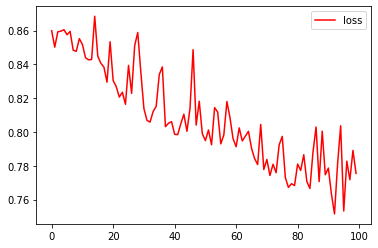

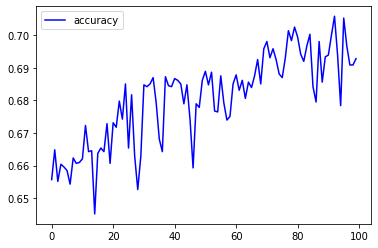

In [83]:
hist = pd.DataFrame(history.history)
print(hist.head())
plt.figure()
plt.plot(hist['loss'],c='r')
plt.legend(['loss'])
plt.show()
plt.plot(hist['accuracy'],c='b')
plt.legend(['accuracy'])
plt.show()

#Word2VecCBOW


In [84]:
dict_cbow = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Word2VecCBOW/Dictionary.csv')
new_columns = dict_cbow.columns.values
new_columns[0] = 'Month'
dict_cbow.columns = new_columns
dict_cbow = dict_cbow.set_index('Month')
dict_cbow.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
How,0.054010,-0.116635,-0.615176,0.053264,0.270385,-0.034695,0.660015,0.435280,-0.167341,0.072743,-0.081690,-0.199493,0.041174,0.343824,0.363869,-0.056462,0.333451,-0.031356,-0.219526,0.017895,0.192430,0.360702,0.250293,0.447572,-0.409847,0.362227,-0.055411,0.018955,-0.317367,-0.007409,0.145666,-0.009043,-0.041776,0.302149,0.602522,-0.472846,0.086138,0.475878,-0.056626,-0.303826,...,0.593062,-0.235644,-0.358872,0.059637,0.143638,-0.284239,0.377261,0.162162,0.523762,-0.398577,0.280657,0.533163,-0.161320,0.406426,-0.115575,-0.182342,-0.224664,0.173816,-0.139930,-0.542530,0.435035,-0.371732,0.284868,0.788156,-0.105276,0.208798,0.036610,0.869398,-0.072490,0.438198,-0.095018,0.083041,0.114968,0.319551,0.164187,0.009881,-0.315001,0.081630,-0.110300,-0.092392
the,-0.852750,0.432507,-0.289424,0.795800,0.023257,0.050553,-0.830053,-0.742640,-0.421492,0.356275,-0.170520,0.668634,-0.030951,0.300104,0.861248,0.583642,0.428347,0.120406,0.106232,0.625573,1.054794,0.543136,0.728656,0.110497,-0.630705,-0.065428,-0.368490,-0.886051,-0.680582,0.173473,0.158773,0.402065,-0.398248,-0.212494,0.249046,-0.135494,1.107102,0.753997,0.078687,0.289999,...,0.708970,-1.197734,-0.103120,-0.890021,-0.476998,0.471254,-0.151074,0.949742,0.493666,0.069152,0.603835,0.461832,-0.410488,-0.247846,0.159008,-0.021451,-0.259697,0.255975,-0.038003,-0.400884,-0.106482,0.134460,-0.114582,0.085091,0.074969,-0.807609,-0.890234,-0.814566,-0.042241,-0.848224,-0.292800,0.834626,-0.036491,0.225063,0.557594,-0.570594,0.167689,0.379619,-0.497976,0.392273
fuck,0.167770,0.119974,0.302141,-0.200799,-0.266057,-0.301892,0.327918,0.003196,0.631058,0.265193,-0.137870,0.084515,0.252873,0.114272,-0.339069,-0.215894,0.175621,0.142763,-0.258152,0.352802,-0.115566,0.008143,0.032092,0.359854,0.236001,-0.119994,-0.050785,0.277579,0.345362,0.277167,-0.202077,0.301460,0.385830,-0.000850,-0.164581,0.036501,-0.155205,-0.110175,-0.177312,-0.300878,...,0.198516,0.242411,0.014289,0.190846,-0.261074,-0.387869,0.561773,-0.258857,-0.396569,-0.498835,-0.031231,-0.339743,0.739089,0.276680,0.319858,-0.314116,-0.156372,0.113372,-0.133390,0.106388,0.309260,-0.069228,0.124728,0.039303,0.127196,0.034494,0.119910,0.065314,0.143028,0.125673,-0.120518,0.184570,0.115688,-0.376349,0.056164,-0.178325,-0.185697,0.060345,0.015507,0.100795
Who,-0.325103,-0.196605,-0.298863,0.149170,0.163655,-0.087753,-0.213542,0.291837,0.164022,-0.116587,-0.542942,0.247486,0.216051,0.229936,0.350848,-0.045564,-0.269089,-0.438484,0.234107,-0.018791,-0.182762,-0.040871,0.086698,-0.042436,-0.173498,0.061358,0.282062,-0.279571,0.259520,0.427197,0.396517,0.254424,0.165994,0.384576,0.001214,-0.237645,0.194899,0.131192,-0.271535,0.312612,...,-0.101488,0.134374,0.092284,0.318618,-0.403911,-0.438786,0.164501,-0.296264,-0.047216,0.052797,0.225831,0.183170,0.146559,-0.707248,0.749275,-0.431474,-0.279717,0.291325,0.107159,-0.226957,-0.515657,0.276505,0.465150,-0.442732,-0.185686,0.097060,-0.655621,0.246724,0.271543,0.208196,-0.116989,-0.197150,-0.225224,0.185783,0.099388,0.755426,-0.080447,0.143895,-0.020569,0.288599
heck,-0.310433,-0.150483,-0.100078,0.142485,-0.116532,-0.477134,-0.096097,-0.026066,-0.424769,0.585560,-0.550719,-0.189389,0.392410,0.529350,-0.099750,-0.644823,-0.513343,-0.095281,-0.238755,-0.510876,0.672031,0.622922,-0.179614,0.036672,0.037292,0.425749,0.870473,0.566797,0.636458,0.484237,-0.403266,0.132335,0.241753,0.331775,-0.010263,0.228108,-0.179902,-0.232239,-0.223587,0.693765,...,-0.009714,0.384201,-0.249755,0.136071,0.558143,-0.222694,0.456705,0.216483,-0.225993,-0.234217,-0.101956,-0.009981,0.473864,-0.290551,0.462595,-0.321715,-0.132509,-0.054560,0.328517,-0.189278,-0.729748,0.679507,0.579922,-0.015003,0.65

In [85]:
dict_cbow.iloc[1].values

array([-0.85274953,  0.43250686, -0.28942442,  0.79579973,  0.02325693,
        0.05055321, -0.83005339, -0.7426399 , -0.42149204,  0.35627496,
       -0.17051983,  0.6686337 , -0.03095101,  0.3001045 ,  0.86124814,
        0.58364159,  0.42834666,  0.12040621,  0.10623246,  0.6255734 ,
        1.05479407,  0.54313564,  0.7286557 ,  0.11049717, -0.63070494,
       -0.06542764, -0.36848953, -0.88605124, -0.68058169,  0.17347264,
        0.1587728 ,  0.40206516, -0.39824831, -0.21249367,  0.24904564,
       -0.13549401,  1.1071018 ,  0.75399655,  0.07868659,  0.28999907,
        0.42086518, -0.41190037, -0.11232718,  0.38995081,  0.02994548,
       -0.9930017 ,  0.58520281, -0.18855126, -0.29330397, -1.11405098,
       -0.54171312,  1.00253499, -0.55134761, -0.16087891,  0.79052943,
       -0.30076498,  0.70897043, -1.19773448, -0.10312049, -0.89002138,
       -0.47699752,  0.47125438, -0.15107363,  0.94974172,  0.49366617,
        0.06915207,  0.60383505,  0.46183211, -0.41048777, -0.24

In [86]:
 cbow_dict = {}
 for word,ind in zip(dict_cbow.index,range(len(dict_cbow))):
     cbow_dict[word] = dict_cbow.iloc[ind].values

In [87]:
cbow_dict['How']

array([ 0.05400974, -0.11663481, -0.61517572,  0.05326403,  0.27038541,
       -0.03469465,  0.66001517,  0.4352797 , -0.1673414 ,  0.07274283,
       -0.08168963, -0.19949317,  0.04117402,  0.34382391,  0.36386943,
       -0.05646186,  0.33345124, -0.03135552, -0.21952552,  0.01789539,
        0.19243017,  0.36070228,  0.25029302,  0.44757172, -0.40984675,
        0.36222714, -0.05541066,  0.01895536, -0.31736669, -0.00740933,
        0.14566596, -0.00904256, -0.04177569,  0.30214909,  0.60252196,
       -0.47284594,  0.08613777,  0.47587761, -0.05662649, -0.3038263 ,
        0.40591308,  0.12595624,  0.03210615,  0.07017876, -0.25262576,
        0.36623588, -0.03784815, -0.77350724,  0.111642  , -0.05801553,
       -0.12664391,  0.22215991,  0.27096176, -0.20753545, -0.1444246 ,
        0.13647172,  0.59306175, -0.23564386, -0.35887215,  0.0596365 ,
        0.14363845, -0.28423908,  0.37726134,  0.16216175,  0.52376187,
       -0.39857706,  0.2806569 ,  0.53316277, -0.16131985,  0.40

In [88]:
cbow_tweetseq= [];

for tweet in tweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(cbow_dict[word])
      except KeyError:
        temp.append([0]*96)
    else:
      temp.append([0]*96)
    
  cbow_tweetseq.append(temp)

In [89]:
dev_cbow_tweetseq= [];

for tweet in devtweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(cbow_dict[word])
      except KeyError:
        temp.append([0]*96)
    else:
      temp.append([0]*96)
    
  dev_cbow_tweetseq.append(temp)

In [90]:
test_cbow_tweetseq= [];

for tweet in testtweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(cbow_dict[word])
      except KeyError:
        temp.append([0]*96)
    else:
      temp.append([0]*96)
    
  test_cbow_tweetseq.append(temp)

In [91]:
len(cbow_tweetseq[0][-1])

96

In [96]:
cbow_training_padded = np.array(cbow_tweetseq)
labels = list(df_train['Encoding'])
cbow_training_labels = np.array(labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
print(cbow_training_padded.shape)

(3613, 63, 96)


In [101]:
cbow_dev_padded = np.array(dev_cbow_tweetseq)
cbow_dev_labels = list(df_dev['Encoding'])
cbow_dev_labels = np.array(cbow_dev_labels)
# deving_padded = np.array(deving_padded)
# deving_labels = np.array(deving_labels)
print(cbow_dev_padded.shape)

(347, 63, 96)


In [116]:
cbow_test_padded = np.array(test_cbow_tweetseq)
cbow_test_labels = list(df_test['Encoding'])
cbow_test_labels = np.array(cbow_test_labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
print(cbow_test_padded.shape)

(3142, 63, 96)


In [99]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.Input(shape=(63,96)))
model1.add(tf.keras.layers.LSTM(10))
# model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(4, activation='softmax'))

model1.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [102]:
history1 = model1.fit(cbow_training_padded,cbow_training_labels,epochs=100,validation_data=(cbow_dev_padded, cbow_dev_labels))

Epoch 1/100
113/113 [==============================] - 3s 25ms/step - loss: 1.2819 - accuracy: 0.3905 - val_loss: 1.3644 - val_accuracy: 0.3487
Epoch 2/100
113/113 [==============================] - 2s 21ms/step - loss: 1.2095 - accuracy: 0.4285 - val_loss: 1.3839 - val_accuracy: 0.3833
Epoch 3/100
113/113 [==============================] - 3s 23ms/step - loss: 1.1483 - accuracy: 0.4545 - val_loss: 1.4193 - val_accuracy: 0.3458
Epoch 4/100
113/113 [==============================] - 3s 22ms/step - loss: 1.1153 - accuracy: 0.4608 - val_loss: 1.4298 - val_accuracy: 0.3401
Epoch 5/100
113/113 [==============================] - 3s 23ms/step - loss: 1.0755 - accuracy: 0.4719 - val_loss: 1.3995 - val_accuracy: 0.3314
Epoch 6/100
113/113 [==============================] - 2s 21ms/step - loss: 1.0585 - accuracy: 0.4772 - val_loss: 1.4528 - val_accuracy: 0.3372
Epoch 7/100
113/113 [==============================] - 2s 21ms/step - loss: 1.0277 - accuracy: 0.4866 - val_loss: 1.4694 - val_accuracy:

In [118]:
cbow_pred = model1.predict(cbow_test_padded)

In [119]:
print(cbow_pred)
print(type(cbow_pred))
cbow_predicts = []
for i in cbow_pred:
  cbow_predicts.append(np.argmax(i)+1)

print(cbow_predicts)
print(accuracy_score(y_true,cbow_predicts))

[[3.7717063e-02 1.2578803e-01 8.1960630e-01 1.6888682e-02]
 [7.5130194e-01 4.3239344e-02 5.1454429e-02 1.5400423e-01]
 [5.4755401e-02 2.0234212e-03 4.5178158e-04 9.4276947e-01]
 ...
 [6.0166191e-02 1.1658558e-01 7.9885352e-01 2.4394786e-02]
 [6.4505525e-02 2.3187494e-03 5.5366353e-04 9.3262208e-01]
 [5.4375473e-02 2.0120461e-03 4.4778938e-04 9.4316471e-01]]
<class 'numpy.ndarray'>
[3, 1, 4, 4, 3, 4, 3, 2, 4, 4, 2, 3, 3, 3, 2, 4, 4, 3, 1, 2, 3, 3, 3, 3, 1, 3, 1, 1, 3, 4, 1, 2, 1, 2, 3, 3, 3, 3, 4, 2, 4, 4, 1, 3, 4, 4, 4, 4, 2, 3, 3, 1, 4, 1, 3, 3, 3, 4, 4, 1, 4, 4, 4, 3, 2, 2, 1, 2, 1, 4, 1, 1, 3, 4, 3, 3, 2, 3, 3, 1, 2, 1, 2, 2, 1, 2, 3, 3, 4, 2, 3, 2, 1, 2, 3, 3, 4, 3, 3, 4, 4, 1, 2, 4, 4, 4, 1, 4, 2, 1, 4, 1, 1, 1, 2, 1, 4, 1, 4, 4, 1, 1, 4, 2, 1, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 2, 1, 4, 4, 2, 4, 4, 2, 1, 3, 2, 2, 1, 2, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 4, 2, 3, 1, 3, 1, 1, 3, 1, 1, 1, 2, 3, 1, 2, 1, 3, 3, 4, 2, 2, 3, 4, 3, 4, 2, 1, 1, 2, 4, 4, 1, 4, 

       loss  accuracy  val_loss  val_accuracy
0  1.281853  0.390534  1.364363      0.348703
1  1.209466  0.428453  1.383919      0.383285
2  1.148295  0.454470  1.419346      0.345821
3  1.115256  0.460836  1.429833      0.340058
4  1.075546  0.471907  1.399549      0.331412


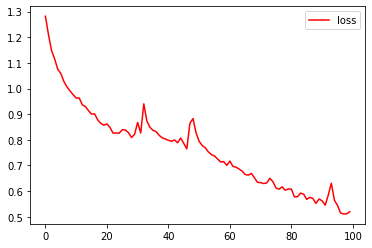

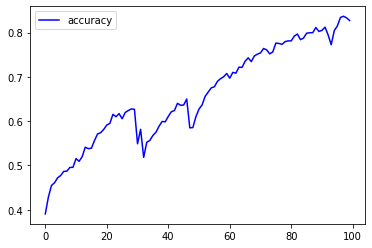

In [120]:
hist1 = pd.DataFrame(history1.history)
print(hist1.head())
plt.figure()
plt.plot(hist1['loss'],c='r')
plt.legend(['loss'])
plt.show()
plt.plot(hist1['accuracy'],c='b')
plt.legend(['accuracy'])
plt.show()

#Word2vec Skip Gram

In [107]:
dict_sg = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Word2VecSG/Dictionary.csv')
new_columns = dict_sg.columns.values
new_columns[0] = 'Month'
dict_sg.columns = new_columns
dict_sg = dict_sg.set_index('Month')
dict_sg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
How,-0.203717,-0.150630,0.223585,0.215566,-0.186923,-0.051414,-0.235733,0.216528,0.255101,-0.251852,-0.108214,-0.071792,-0.068948,-0.217464,-0.250711,0.105806,-0.234507,-0.207686,0.230530,-0.246797,-0.220502,-0.229190,-0.109182,-0.173445,0.116008,-0.087733,0.080736,-0.004632,0.083626,0.137413,-0.225589,-0.179994,-0.236807,-0.084119,-0.054510,-0.134893,0.075126,-0.270162,-0.210055,0.084020,...,0.140968,-0.019526,0.158348,-0.193825,-0.099673,-0.071462,-0.103296,-0.219433,-0.129872,-0.138563,0.203733,0.214830,0.225828,-0.082976,-0.225244,-0.222924,-0.164140,0.228306,-0.055822,0.202472,-0.094650,0.229337,-0.171653,-0.145441,-0.219568,0.210826,-0.253136,-0.229341,0.215176,-0.081329,0.185032,0.198724,-0.238400,0.089491,0.237074,0.082362,0.086279,-0.115474,0.217634,-0.075145
the,-0.020249,-0.055581,0.058226,0.067357,0.102056,-0.165884,-0.078265,0.011241,0.068224,-0.082592,-0.096399,-0.095939,-0.249901,-0.066374,-0.019906,0.327215,-0.085710,-0.013414,0.497962,-0.128527,-0.041930,-0.003189,-0.091269,-0.032244,-0.046544,-0.014560,0.032479,0.217771,0.320780,0.382624,-0.083751,-0.015238,-0.108565,0.089491,-0.325286,-0.051725,0.077845,-0.124761,-0.006340,0.345667,...,-0.024750,0.049666,0.117801,-0.103719,-0.039352,-0.036507,-0.098277,-0.024551,-0.084965,0.082354,0.411697,0.445715,0.037352,-0.207209,-0.067787,-0.021426,-0.282057,0.084286,0.036562,0.105133,-0.275389,0.103467,-0.167495,-0.151169,-0.083688,0.059127,-0.047398,-0.052026,0.009183,-0.070239,0.341254,0.030170,-0.062044,0.151679,0.091647,0.405472,0.359599,-0.035385,0.089669,-0.233588
fuck,0.172204,0.220389,-0.264518,-0.220649,0.204303,0.123914,0.201423,-0.205846,-0.209254,0.156696,0.116075,0.080623,0.107220,0.145527,0.219829,-0.093038,0.309331,0.203282,0.018761,0.235756,0.215612,0.173753,0.161190,0.196485,-0.154591,0.209825,-0.228355,-0.268911,-0.123805,-0.080290,0.229006,0.219902,0.176710,0.299666,0.136986,-0.237599,-0.150431,0.194967,0.201927,-0.120245,...,-0.231463,0.225672,-0.171749,0.188649,0.204998,0.143026,0.153958,0.233967,-0.254732,0.192764,-0.023718,0.041446,-0.196634,0.144821,0.223328,0.163337,-0.157733,-0.197622,0.287350,-0.212386,0.143569,-0.150554,-0.133090,0.051374,0.200745,-0.239494,0.226291,0.247036,-0.211476,0.142916,-0.000605,-0.198903,0.238517,-0.287782,-0.164459,-0.098404,-0.257718,0.132124,-0.208409,0.088058
Who,0.165534,0.125423,-0.107816,-0.152515,0.116251,0.130986,0.145456,-0.174382,-0.133706,0.124085,0.138719,0.098512,0.155907,0.147397,0.168194,-0.107032,0.161260,0.114801,0.003562,0.162068,0.152181,0.167083,0.138048,0.172092,-0.123444,0.123377,-0.128412,-0.108242,-0.144372,-0.126256,0.119656,0.140144,0.177066,0.153316,0.115564,-0.051353,-0.137380,0.157938,0.141982,-0.103739,...,-0.145492,0.139002,-0.128389,0.141588,0.121400,0.132507,0.133157,0.140291,-0.071448,0.108176,-0.000131,-0.024701,-0.160432,0.114939,0.160464,0.141475,-0.003681,-0.128370,0.131249,-0.135424,0.121098,-0.161445,0.042588,0.076072,0.128665,-0.149823,0.154419,0.122090,-0.148230,0.125169,-0.041957,-0.143731,0.091284,-0.093439,-0.119944,-0.107194,-0.102921,0.138282,-0.149017,0.124798
heck,0.131980,0.142158,-0.151761,-0.150958,0.117151,0.101149,0.153567,-0.129345,-0.158239,0.122661,0.138580,0.109282,0.128112,0.142298,0.136731,-0.114137,0.177010,0.158514,-0.034056,0.125972,0.115827,0.115073,0.102156,0.131441,-0.130387,0.120186,-0.142124,-0.151644,-0.098391,-0.108382,0.144654,0.112785,0.134998,0.175472,0.099318,-0.115947,-0.141044,0.131650,0.140304,-0.126614,...,-0.162463,0.158608,-0.116448,0.124437,0.114633,0.123475,0.105641,0.140578,-0.129072,0.127105,-0.015039,0.000366,-0.120594,0.116885,0.142377,0.114756,-0.113968,-0.142936,0.123577,-0

In [108]:
sg_dict = {}
for word,ind in zip(dict_sg.index,range(len(dict_sg))):
    sg_dict[word] = dict_sg.iloc[ind].values

print(sg_dict['the'].shape)

(256,)


In [109]:
sg_tweetseq= [];

for tweet in tweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(sg_dict[word])
      except KeyError:
        temp.append([0]*256)
    else:
      temp.append([0]*256)
    
  sg_tweetseq.append(temp)

In [110]:
dev_sg_tweetseq= [];

for tweet in devtweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(sg_dict[word])
      except KeyError:
        temp.append([0]*256)
    else:
      temp.append([0]*256)
    
  dev_sg_tweetseq.append(temp)

In [111]:
test_sg_tweetseq= [];

for tweet in testtweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(sg_dict[word])
      except KeyError:
        temp.append([0]*256)
    else:
      temp.append([0]*256)
    
  test_sg_tweetseq.append(temp)

In [112]:
sg_training_padded = np.array(sg_tweetseq)
labels = list(df_train['Encoding'])
sg_training_labels = np.array(labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)""
print(sg_training_padded.shape)

(3613, 63, 256)


In [114]:
sg_dev_padded = np.array(dev_sg_tweetseq)
sg_dev_labels = list(df_dev['Encoding'])
sg_dev_labels = np.array(sg_dev_labels)
# deving_padded = np.array(deving_padded)
# deving_labels = np.array(deving_labels)
print(sg_dev_padded.shape)

(347, 63, 256)


In [115]:
sg_test_padded = np.array(test_sg_tweetseq)
sg_test_labels = list(df_test['Encoding'])
sg_test_labels = np.array(sg_test_labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
print(sg_test_padded.shape)

(3142, 63, 256)


In [121]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.Input(shape=(63,256)))
model2.add(tf.keras.layers.LSTM(20))
# model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(4, activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [123]:
history2 = model2.fit(sg_training_padded,sg_training_labels,epochs=100,validation_data=(sg_dev_padded, sg_dev_labels))

Epoch 1/100
113/113 [==============================] - 3s 30ms/step - loss: 0.9945 - accuracy: 0.5270 - val_loss: 1.3988 - val_accuracy: 0.3919
Epoch 2/100
113/113 [==============================] - 3s 26ms/step - loss: 0.9676 - accuracy: 0.5480 - val_loss: 1.5191 - val_accuracy: 0.3573
Epoch 3/100
113/113 [==============================] - 3s 26ms/step - loss: 0.9816 - accuracy: 0.5372 - val_loss: 1.4715 - val_accuracy: 0.3775
Epoch 4/100
113/113 [==============================] - 3s 26ms/step - loss: 0.9921 - accuracy: 0.5414 - val_loss: 1.4454 - val_accuracy: 0.3602
Epoch 5/100
113/113 [==============================] - 3s 26ms/step - loss: 0.9510 - accuracy: 0.5657 - val_loss: 1.4939 - val_accuracy: 0.3718
Epoch 6/100
113/113 [==============================] - 3s 26ms/step - loss: 0.9377 - accuracy: 0.5638 - val_loss: 1.5973 - val_accuracy: 0.3631
Epoch 7/100
113/113 [==============================] - 3s 26ms/step - loss: 0.9500 - accuracy: 0.5619 - val_loss: 1.5504 - val_accuracy:

In [124]:
sg_pred = model2.predict(sg_test_padded)

In [125]:
print(sg_pred)
print(type(sg_pred))
sg_predicts = []
for i in sg_pred:
  sg_predicts.append(np.argmax(i)+1)

print(sg_predicts)
print(accuracy_score(y_true,sg_predicts))

[[0.02024771 0.47644767 0.49277174 0.01053301]
 [0.8641092  0.07990107 0.02421807 0.03177169]
 [0.10300097 0.08113434 0.07577062 0.74009407]
 ...
 [0.00999359 0.32095316 0.6626937  0.00635952]
 [0.05251918 0.05122781 0.05397851 0.8422744 ]
 [0.04094158 0.04212327 0.04675382 0.8701813 ]]
<class 'numpy.ndarray'>
[3, 1, 4, 4, 3, 4, 3, 3, 4, 4, 2, 3, 3, 3, 2, 4, 4, 4, 1, 2, 3, 2, 3, 3, 1, 2, 2, 1, 1, 4, 4, 3, 1, 1, 2, 3, 3, 3, 4, 2, 4, 4, 1, 3, 4, 4, 4, 4, 2, 3, 3, 1, 4, 1, 1, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2, 2, 1, 3, 1, 4, 1, 4, 4, 4, 4, 3, 3, 2, 2, 4, 2, 2, 3, 2, 1, 2, 3, 3, 4, 2, 3, 3, 2, 1, 3, 1, 4, 3, 3, 4, 4, 1, 2, 4, 4, 4, 1, 4, 2, 1, 4, 2, 1, 4, 2, 1, 4, 2, 4, 4, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 2, 4, 3, 4, 3, 3, 3, 4, 2, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 2, 4, 4, 2, 4, 4, 3, 3, 3, 1, 3, 2, 2, 2, 1, 1, 2, 2, 4, 4, 1, 1, 1, 4, 2, 3, 4, 2, 1, 4, 3, 1, 1, 4, 1, 3, 1, 2, 1, 3, 3, 4, 3, 2, 3, 4, 3, 1, 1, 4, 1, 3, 4, 4, 1, 4, 3, 4, 3, 1, 2, 2, 2, 1, 3, 2, 1, 3, 3, 3, 4, 4, 1, 2, 4, 3, 3, 1, 4, 2, 

       loss  accuracy  val_loss  val_accuracy
0  0.994514  0.526986  1.398831      0.391931
1  0.967626  0.548021  1.519089      0.357349
2  0.981550  0.537227  1.471471      0.377522
3  0.992111  0.541378  1.445391      0.360231
4  0.950984  0.565735  1.493938      0.371758


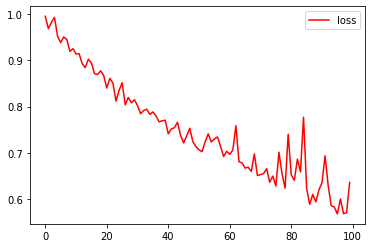

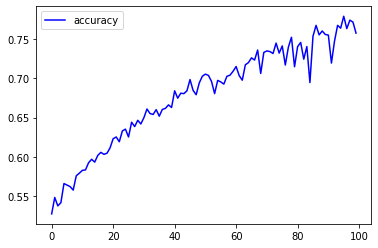

In [126]:
hist2 = pd.DataFrame(history2.history)
print(hist2.head())
plt.figure()
plt.plot(hist2['loss'],c='r')
plt.legend(['loss'])
plt.show()
plt.plot(hist2['accuracy'],c='b')
plt.legend(['accuracy'])
plt.show()

#All test data

In [127]:
df_test = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Data/Test/clean_all_test.csv')

In [128]:
df_test.head()

,Unnamed: 0,Tweets,Labels,Category
0,0,At the point today where if someone says somet...,0.319,anger
1,1,IT S GAME DAY T MINUS 14Happy ...,0.144,anger
2,2,This game has pissed me off more than any othe...,0.898,anger
3,3,I have just found out it is Candice and not C...,0.271,anger
4,4,if he cannot come to my Mum a 60th after ...,0.646,anger


#RNN


In [129]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.Input(shape=(63,25)))
model3.add(tf.keras.layers.SimpleRNN(50))
# mod3l2.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.Dense(4, activation='softmax'))

model3.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [130]:
history = model3.fit(training_padded,training_labels,epochs=100,validation_data=(dev_padded, dev_labels))

Epoch 1/100
113/113 [==============================] - 2s 13ms/step - loss: 1.3838 - accuracy: 0.2956 - val_loss: 1.3889 - val_accuracy: 0.2536
Epoch 2/100
113/113 [==============================] - 1s 11ms/step - loss: 1.3754 - accuracy: 0.3105 - val_loss: 1.3803 - val_accuracy: 0.3285
Epoch 3/100
113/113 [==============================] - 1s 11ms/step - loss: 1.3747 - accuracy: 0.3147 - val_loss: 1.3835 - val_accuracy: 0.3170
Epoch 4/100
113/113 [==============================] - 1s 11ms/step - loss: 1.3726 - accuracy: 0.3158 - val_loss: 1.3791 - val_accuracy: 0.3228
Epoch 5/100
113/113 [==============================] - 1s 11ms/step - loss: 1.3730 - accuracy: 0.3197 - val_loss: 1.3821 - val_accuracy: 0.2968
Epoch 6/100
113/113 [==============================] - 1s 11ms/step - loss: 1.3730 - accuracy: 0.3078 - val_loss: 1.4006 - val_accuracy: 0.2738
Epoch 7/100
113/113 [==============================] - 1s 12ms/step - loss: 1.3741 - accuracy: 0.3147 - val_loss: 1.3797 - val_accuracy:

In [145]:
rnn_pred = model3.predict(testtraining_padded)

In [146]:
print(rnn_pred)
print(type(rnn_pred))
rnn_predicts = []
for i in rnn_pred:
  rnn_predicts.append(np.argmax(i)+1)

print(rnn_predicts)
print(accuracy_score(y_true,rnn_predicts))

[[0.18109858 0.2107193  0.2292737  0.37890846]
 [0.28260043 0.21997352 0.2209118  0.27651426]
 [0.24127582 0.22621962 0.23740463 0.29509994]
 ...
 [0.21798141 0.21376953 0.21472527 0.35352376]
 [0.28260043 0.21997352 0.2209118  0.27651423]
 [0.24127582 0.2262196  0.2374046  0.29509994]]
<class 'numpy.ndarray'>
[4, 1, 4, 1, 1, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 4, 1, 1, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 1, 1, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 4, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 1, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 

In [131]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.Input(shape=(63,96)))
model4.add(tf.keras.layers.SimpleRNN(50))
# mod3l2.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(4, activation='softmax'))

model4.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [132]:
history4 = model4.fit(cbow_training_padded,cbow_training_labels,epochs=100,validation_data=(cbow_dev_padded, cbow_dev_labels))

Epoch 1/100
113/113 [==============================] - 2s 14ms/step - loss: 1.3776 - accuracy: 0.3039 - val_loss: 1.3780 - val_accuracy: 0.3170
Epoch 2/100
113/113 [==============================] - 1s 13ms/step - loss: 1.3794 - accuracy: 0.3139 - val_loss: 1.3796 - val_accuracy: 0.3141
Epoch 3/100
113/113 [==============================] - 1s 13ms/step - loss: 1.3728 - accuracy: 0.3258 - val_loss: 1.3876 - val_accuracy: 0.2997
Epoch 4/100
113/113 [==============================] - 1s 13ms/step - loss: 1.3440 - accuracy: 0.3559 - val_loss: 1.3735 - val_accuracy: 0.3429
Epoch 5/100
113/113 [==============================] - 1s 12ms/step - loss: 1.2925 - accuracy: 0.3880 - val_loss: 1.3563 - val_accuracy: 0.3372
Epoch 6/100
113/113 [==============================] - 2s 14ms/step - loss: 1.2620 - accuracy: 0.4293 - val_loss: 1.3889 - val_accuracy: 0.3170
Epoch 7/100
113/113 [==============================] - 1s 13ms/step - loss: 1.2461 - accuracy: 0.4226 - val_loss: 1.4225 - val_accuracy:

In [135]:
rnn_cbow_pred = model4.predict(cbow_test_padded)

In [136]:
print(rnn_cbow_pred)
print(type(rnn_cbow_pred))
rnn_cbow_predicts = []
for i in rnn_cbow_pred:
  rnn_cbow_predicts.append(np.argmax(i)+1)

print(rnn_cbow_predicts)
print(accuracy_score(y_true,rnn_cbow_predicts))

[[0.18986979 0.1821985  0.26797482 0.3599569 ]
 [0.2941971  0.2552478  0.20045623 0.2500989 ]
 [0.2941985  0.25525203 0.2004564  0.25009307]
 ...
 [0.1898675  0.18219918 0.2679701  0.35996318]
 [0.18986496 0.18220553 0.26797312 0.35995638]
 [0.18986446 0.18219283 0.26797006 0.35997263]]
<class 'numpy.ndarray'>
[4, 1, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 1, 4, 1, 4, 4, 1, 4, 1, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 1, 1, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 

In [133]:
model5 = tf.keras.Sequential()
model5.add(tf.keras.Input(shape=(63,256)))
model5.add(tf.keras.layers.SimpleRNN(50))
# mod3l2.add(tf.keras.layers.Dropout(0.2))
model5.add(tf.keras.layers.Dense(4, activation='softmax'))

model5.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [134]:
history5 = model5.fit(sg_training_padded,sg_training_labels,epochs=100,validation_data=(sg_dev_padded, sg_dev_labels))

Epoch 1/100
113/113 [==============================] - 2s 19ms/step - loss: 1.3796 - accuracy: 0.3000 - val_loss: 1.3774 - val_accuracy: 0.3112
Epoch 2/100
113/113 [==============================] - 2s 16ms/step - loss: 1.3747 - accuracy: 0.3222 - val_loss: 1.3813 - val_accuracy: 0.3228
Epoch 3/100
113/113 [==============================] - 2s 16ms/step - loss: 1.3779 - accuracy: 0.3108 - val_loss: 1.3784 - val_accuracy: 0.3170
Epoch 4/100
113/113 [==============================] - 2s 17ms/step - loss: 1.3692 - accuracy: 0.3202 - val_loss: 1.3796 - val_accuracy: 0.3141
Epoch 5/100
113/113 [==============================] - 2s 17ms/step - loss: 1.3703 - accuracy: 0.3236 - val_loss: 1.3759 - val_accuracy: 0.3256
Epoch 6/100
113/113 [==============================] - 2s 16ms/step - loss: 1.3672 - accuracy: 0.3316 - val_loss: 1.4237 - val_accuracy: 0.2075
Epoch 7/100
113/113 [==============================] - 2s 16ms/step - loss: 1.3623 - accuracy: 0.3330 - val_loss: 1.3815 - val_accuracy:

In [137]:
rnn_sg_pred = model5.predict(sg_test_padded)

In [138]:
print(rnn_sg_pred)
print(type(rnn_sg_pred))
rnn_sg_predicts = []
for i in rnn_sg_pred:
  rnn_sg_predicts.append(np.argmax(i)+1)

print(rnn_sg_predicts)
print(accuracy_score(y_true,rnn_sg_predicts))

[[0.21187946 0.23676346 0.23348436 0.31787273]
 [0.26745006 0.20063046 0.21656768 0.31535175]
 [0.26744983 0.20062995 0.21656857 0.31535164]
 ...
 [0.21178085 0.23734668 0.23278898 0.31808344]
 [0.21180436 0.23709577 0.23309521 0.3180047 ]
 [0.21175325 0.23712735 0.2330745  0.31804487]]
<class 'numpy.ndarray'>
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

#Bi-Directional LSTM

In [147]:
model6 = tf.keras.Sequential()
model6.add(tf.keras.Input(shape=(63,25)))
model6.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)))
# mod6l2.add(tf.keras.layers.Dropout(0.2))
model6.add(tf.keras.layers.Dense(4, activation='softmax'))

model6.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [149]:
history6 = model6.fit(training_padded,training_labels,epochs=100,validation_data=(dev_padded, dev_labels))

Epoch 1/100
113/113 [==============================] - 4s 34ms/step - loss: 1.3368 - accuracy: 0.3537 - val_loss: 1.3209 - val_accuracy: 0.3833
Epoch 2/100
113/113 [==============================] - 3s 29ms/step - loss: 1.2762 - accuracy: 0.4052 - val_loss: 1.2748 - val_accuracy: 0.4294
Epoch 3/100
113/113 [==============================] - 3s 30ms/step - loss: 1.2434 - accuracy: 0.4309 - val_loss: 1.2521 - val_accuracy: 0.4294
Epoch 4/100
113/113 [==============================] - 3s 29ms/step - loss: 1.2157 - accuracy: 0.4462 - val_loss: 1.2463 - val_accuracy: 0.4409
Epoch 5/100
113/113 [==============================] - 3s 28ms/step - loss: 1.1918 - accuracy: 0.4694 - val_loss: 1.2281 - val_accuracy: 0.4611
Epoch 6/100
113/113 [==============================] - 3s 29ms/step - loss: 1.1745 - accuracy: 0.4642 - val_loss: 1.2407 - val_accuracy: 0.4352
Epoch 7/100
113/113 [==============================] - 3s 29ms/step - loss: 1.1532 - accuracy: 0.4741 - val_loss: 1.2275 - val_accuracy:

In [150]:
rnn_pred = model6.predict(testtraining_padded)

In [151]:
print(rnn_pred)
print(type(rnn_pred))
rnn_predicts = []
for i in rnn_pred:
  rnn_predicts.append(np.argmax(i)+1)

print(rnn_predicts)
print(accuracy_score(y_true,rnn_predicts))

[[4.8296708e-05 5.5743283e-05 9.9974006e-01 1.5593863e-04]
 [7.6522392e-01 5.8291174e-02 9.2710450e-04 1.7555785e-01]
 [2.5709657e-02 9.4822407e-02 2.7477101e-03 8.7672019e-01]
 ...
 [1.3502984e-04 7.1662604e-03 9.9232328e-01 3.7551238e-04]
 [9.8377257e-04 9.9020945e-03 3.0470666e-05 9.8908359e-01]
 [4.0437175e-05 5.9261881e-02 3.4914966e-04 9.4034857e-01]]
<class 'numpy.ndarray'>
[3, 1, 4, 4, 3, 4, 3, 2, 4, 4, 2, 3, 3, 3, 2, 4, 3, 2, 1, 2, 3, 2, 3, 3, 1, 3, 2, 1, 1, 4, 4, 2, 1, 2, 3, 3, 3, 3, 4, 2, 4, 4, 1, 2, 4, 4, 4, 4, 1, 3, 3, 1, 4, 1, 1, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2, 2, 1, 2, 1, 4, 1, 4, 3, 4, 4, 3, 2, 3, 3, 4, 2, 1, 2, 3, 1, 2, 1, 3, 4, 2, 3, 2, 1, 2, 3, 2, 4, 3, 3, 4, 4, 1, 2, 4, 4, 4, 1, 4, 2, 1, 4, 1, 1, 4, 2, 1, 4, 1, 4, 4, 1, 1, 2, 2, 1, 1, 4, 1, 2, 1, 3, 4, 3, 4, 3, 1, 3, 4, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 2, 2, 4, 4, 2, 4, 4, 2, 3, 3, 2, 3, 3, 2, 1, 1, 1, 3, 3, 2, 4, 1, 1, 1, 4, 2, 3, 4, 2, 1, 4, 3, 1, 1, 1, 2, 3, 1, 2, 1, 3, 3, 4, 2, 2, 3, 4, 3, 4, 2, 4, 1, 2, 4, 4, 1, 4, 

In [152]:
model7 = tf.keras.Sequential()
model7.add(tf.keras.Input(shape=(63,96)))
model7.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)))
# mod7l2.add(tf.keras.layers.Dropout(0.2))
model7.add(tf.keras.layers.Dense(4, activation='softmax'))

model7.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [153]:
history7 = model7.fit(cbow_training_padded,cbow_training_labels,epochs=100,validation_data=(dev_padded, dev_labels))

Epoch 1/100
113/113 [==============================] - 4s 35ms/step - loss: 1.3755 - accuracy: 0.3061 - val_loss: 1.3667 - val_accuracy: 0.3228
Epoch 2/100
113/113 [==============================] - 3s 29ms/step - loss: 1.3408 - accuracy: 0.3402 - val_loss: 1.3374 - val_accuracy: 0.3948
Epoch 3/100
113/113 [==============================] - 3s 29ms/step - loss: 1.2745 - accuracy: 0.4110 - val_loss: 1.2666 - val_accuracy: 0.4236
Epoch 4/100
113/113 [==============================] - 3s 29ms/step - loss: 1.2194 - accuracy: 0.4484 - val_loss: 1.2622 - val_accuracy: 0.4092
Epoch 5/100
113/113 [==============================] - 3s 30ms/step - loss: 1.1862 - accuracy: 0.4611 - val_loss: 1.2517 - val_accuracy: 0.4236
Epoch 6/100
113/113 [==============================] - 3s 30ms/step - loss: 1.1607 - accuracy: 0.4774 - val_loss: 1.2328 - val_accuracy: 0.4294
Epoch 7/100
113/113 [==============================] - 3s 29ms/step - loss: 1.1367 - accuracy: 0.5043 - val_loss: 1.2593 - val_accuracy:

In [160]:
bi_cbow_pred = model7.predict(cbow_test_padded)

ValueError: ignored

In [ ]:
print(rnn_cbow_pred)
print(type(rnn_cbow_pred))
rnn_cbow_predicts = []
for i in rnn_cbow_pred:
  rnn_cbow_predicts.append(np.argmax(i)+1)

print(rnn_cbow_predicts)
print(accuracy_score(y_true,rnn_cbow_predicts))

In [157]:
model8 = tf.keras.Sequential()
model8.add(tf.keras.Input(shape=(63,256)))
model8.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)))
# mod8l2.add(tf.keras.layers.Dropout(0.2))
model8.add(tf.keras.layers.Dense(4, activation='softmax'))

model8.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [158]:
history8 = model8.fit(sg_training_padded,sg_training_labels,epochs=100,validation_data=(sg_dev_padded, sg_dev_labels))

Epoch 1/100
113/113 [==============================] - 5s 46ms/step - loss: 1.3750 - accuracy: 0.3056 - val_loss: 1.3776 - val_accuracy: 0.3112
Epoch 2/100
113/113 [==============================] - 5s 40ms/step - loss: 1.3553 - accuracy: 0.3371 - val_loss: 1.3800 - val_accuracy: 0.2795
Epoch 3/100
113/113 [==============================] - 5s 41ms/step - loss: 1.3252 - accuracy: 0.3753 - val_loss: 1.3873 - val_accuracy: 0.3084
Epoch 4/100
113/113 [==============================] - 4s 39ms/step - loss: 1.3009 - accuracy: 0.3886 - val_loss: 1.3973 - val_accuracy: 0.3199
Epoch 5/100
113/113 [==============================] - 5s 41ms/step - loss: 1.2779 - accuracy: 0.4182 - val_loss: 1.3965 - val_accuracy: 0.3256
Epoch 6/100
113/113 [==============================] - 4s 39ms/step - loss: 1.2408 - accuracy: 0.4398 - val_loss: 1.4000 - val_accuracy: 0.3343
Epoch 7/100
113/113 [==============================] - 4s 39ms/step - loss: 1.2196 - accuracy: 0.4545 - val_loss: 1.4213 - val_accuracy:

In [ ]:
rnn_sg_pred = model8.predict(sg_test_padded)

In [ ]:
print(rnn_sg_pred)
print(type(rnn_sg_pred))
rnn_sg_predicts = []
for i in rnn_sg_pred:
  rnn_sg_predicts.append(np.argmax(i)+1)

print(rnn_sg_predicts)
print(accuracy_score(y_true,rnn_sg_predicts))